# Stock Forecasting using PyFlux

### Beta Skew-t GARCH models

https://github.com/RJT1990/pyflux

In [1]:
# Data manipulation
# ==============================================================================
import pandas as pd
import numpy as np
import datetime

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Modelling and Forecasting
# ==============================================================================
import pyflux as pf

# Warnings configuration
# ==============================================================================
import warnings
warnings.filterwarnings("ignore")

# Yahoo finance is used to fetch data 
# ==============================================================================
import yfinance as yf
yf.pdr_override()

In [2]:
symbol = '^GSPC' # input
start = '2020-01-01' # input 
end = '2022-07-22'  # input
df = yf.download(symbol, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,3244.669922,3258.139893,3235.530029,3257.850098,3257.850098,3458250000
2020-01-03,3226.360107,3246.149902,3222.340088,3234.850098,3234.850098,3461290000
2020-01-06,3217.550049,3246.840088,3214.639893,3246.280029,3246.280029,3674070000
2020-01-07,3241.860107,3244.909912,3232.429932,3237.179932,3237.179932,3420380000
2020-01-08,3238.590088,3267.070068,3236.669922,3253.050049,3253.050049,3720890000


In [4]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-07-15,3818.000000,3863.620117,3817.179932,3863.159912,3863.159912,3537130000
2022-07-18,3883.790039,3902.439941,3818.629883,3830.850098,3830.850098,3414470000
2022-07-19,3860.729980,3939.810059,3860.729980,3936.689941,3936.689941,3160350000
2022-07-20,3935.320068,3974.129883,3922.030029,3959.899902,3959.899902,3452150000
2022-07-21,3955.469971,3999.290039,3927.639893,3998.949951,3998.949951,3586030000


In [5]:
log_returns = pd.DataFrame(np.diff(np.log(df['Adj Close'].values)))
log_returns.index = df.index.values[1:df.index.values.shape[0]]
log_returns.columns = [symbol + " Returns"]

log_returns.head()

,^GSPC Returns
2020-01-03,-0.007085
2020-01-06,0.003527
2020-01-07,-0.002807
2020-01-08,0.004890
2020-01-09,0.006633


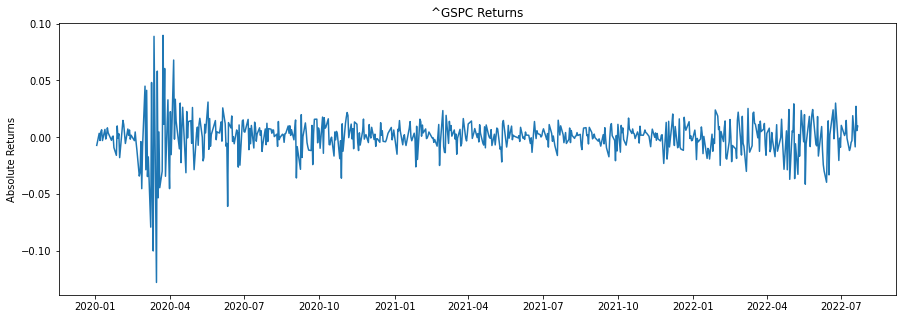

In [6]:
plt.figure(figsize=(15, 5))
plt.plot(log_returns)
plt.ylabel("Absolute Returns")
plt.title(symbol + " Returns")
plt.show()

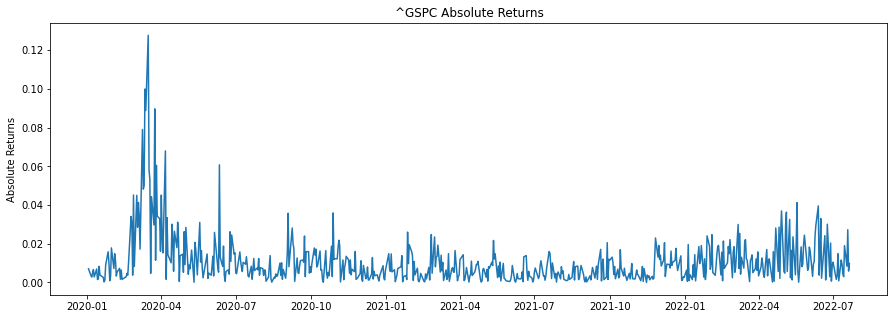

In [7]:
plt.figure(figsize=(15, 5))
plt.plot(np.abs(log_returns))
plt.ylabel("Absolute Returns")
plt.title(symbol + " Absolute Returns")
plt.show()

In [8]:
skewt_model = pf.SEGARCH(p=1, q=1, data=log_returns, target='^GSPC Returns')
x = skewt_model.fit()
x.summary()

SEGARCH(1,1)                                                                                              
======================================================= ==================================================
Dependent Variable: ^GSPC Returns                       Method: MLE                                       
Start Date: 2020-01-06 00:00:00                         Log Likelihood: 1953.6275                         
End Date: 2022-07-21 00:00:00                           AIC: -3895.255                                    
Number of observations: 641                             BIC: -3868.4769                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Vol Constant                             -0.4048    0.1575     -2.5699  0.0102   (-0.7135 | -0.0961)      
p(1)                                 

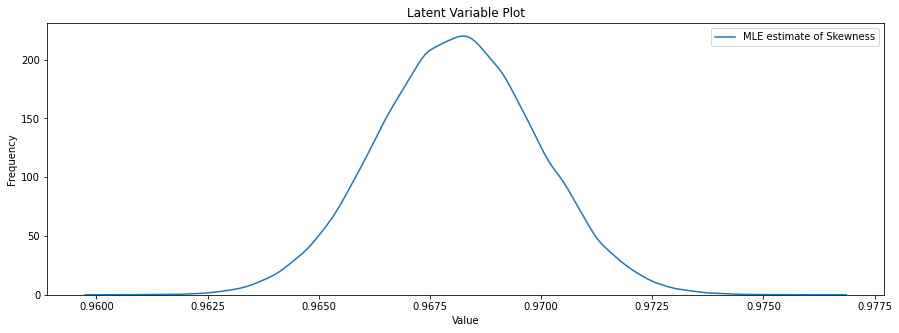

In [9]:
skewt_model.plot_z([3],figsize=(15,5))

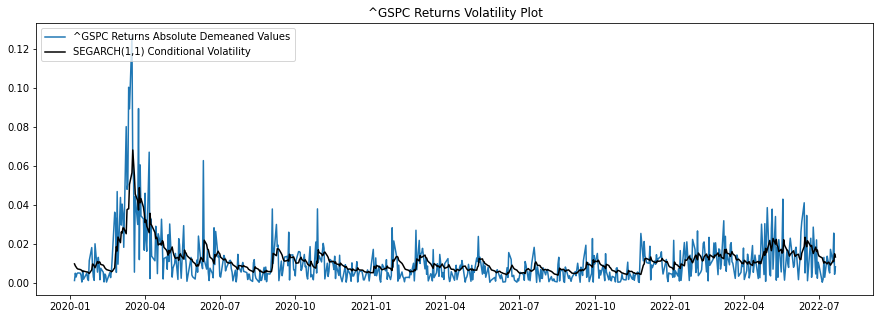

In [10]:
skewt_model.plot_fit(figsize=(15,5))

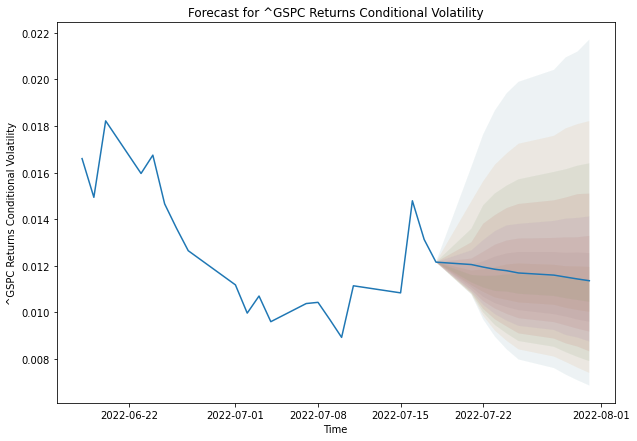

In [11]:
skewt_model.plot_predict(h=10)

In [12]:
skewt_model = pf.SEGARCH(p=1,q=1,data=log_returns,target='^GSPC Returns')
skewt_model.add_leverage()
x = skewt_model.fit()
x.summary()

SEGARCH(1,1)                                                                                              
======================================================= ==================================================
Dependent Variable: ^GSPC Returns                       Method: MLE                                       
Start Date: 2020-01-06 00:00:00                         Log Likelihood: 1961.9318                         
End Date: 2022-07-21 00:00:00                           AIC: -3909.8636                                   
Number of observations: 641                             BIC: -3878.6224                                   
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Vol Constant                             -0.2594    0.1152     -2.2522  0.0243   (-0.4851 | -0.0337)      
p(1)                                 

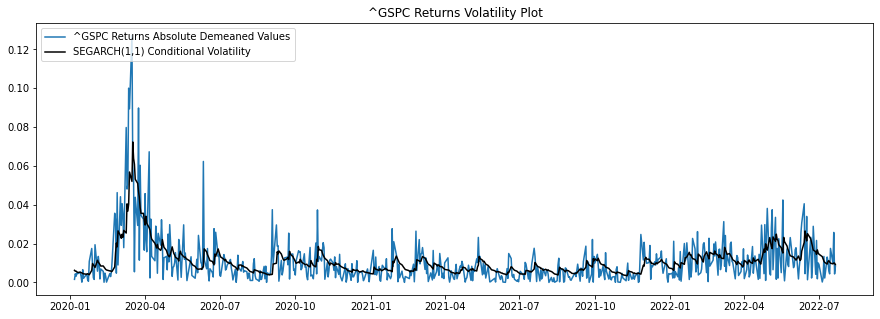

In [13]:
skewt_model.plot_fit(figsize=(15,5))

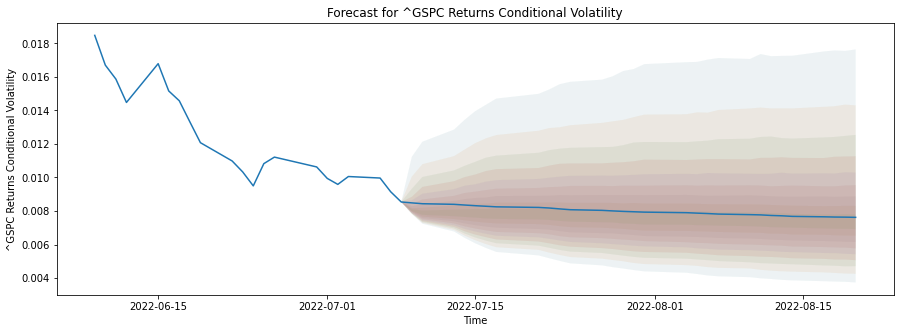

In [14]:
skewt_model.plot_predict(h=30,figsize=(15,5))